In [1]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Data information

In [2]:
names = ["Wine type", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
         "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280", "Proline"]
df = pd.read_csv("./wine.data", index_col=False, names=names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine type               178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
df.head()

,Wine type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Dataset visualization

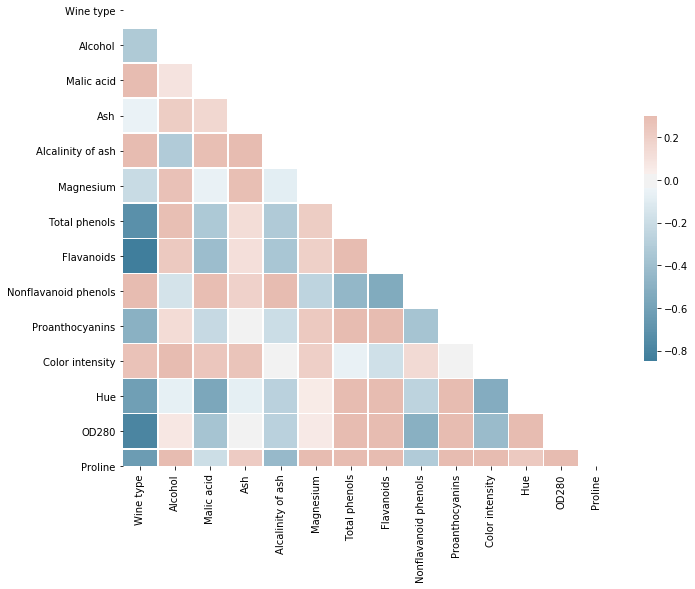

In [4]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

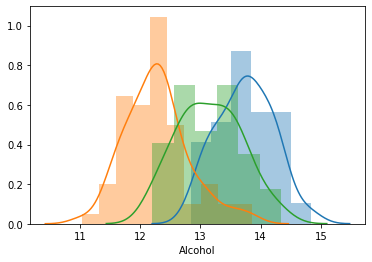

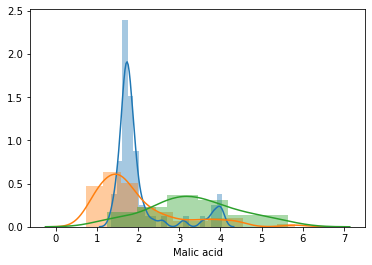

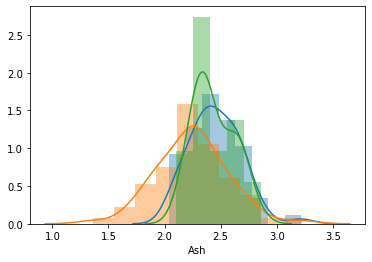

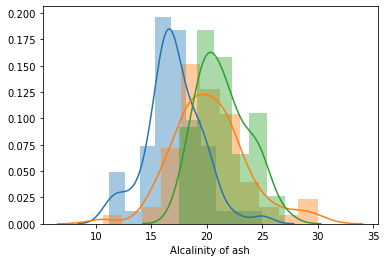

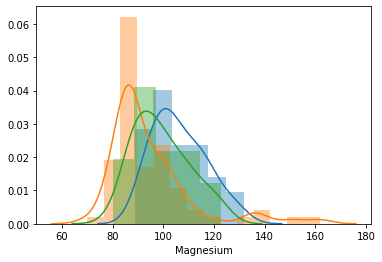

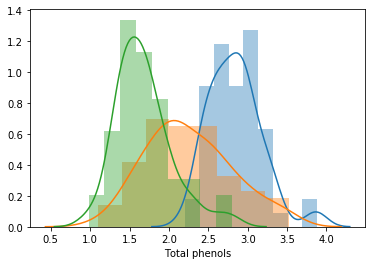

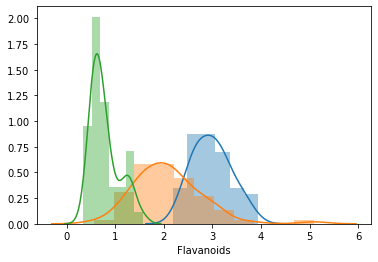

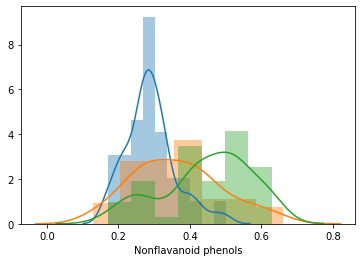

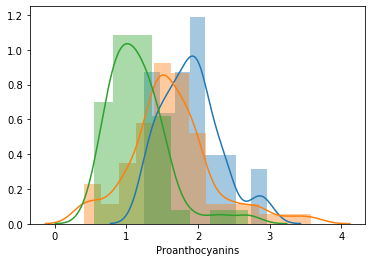

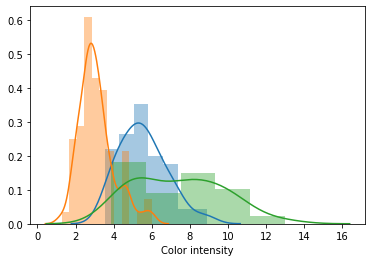

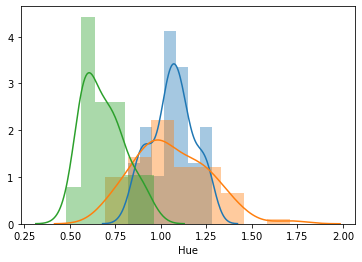

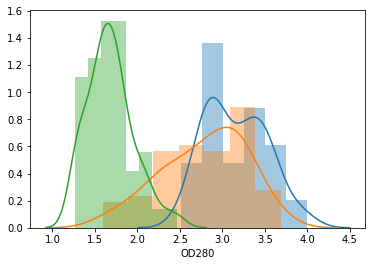

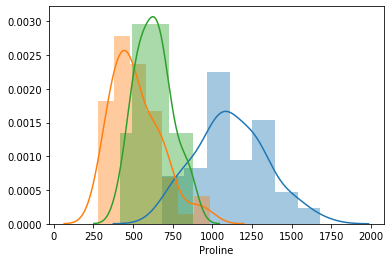

<Figure size 432x288 with 0 Axes>

In [5]:
for column in names[1:]:
    for i in range(1, 4, 1):
        x = df[column][df["Wine type"] == i]
        sns.distplot(x)
    plt.figure()

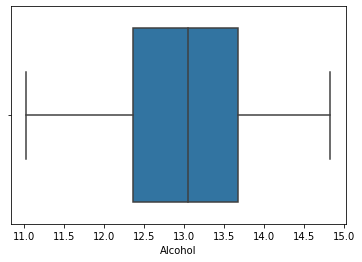

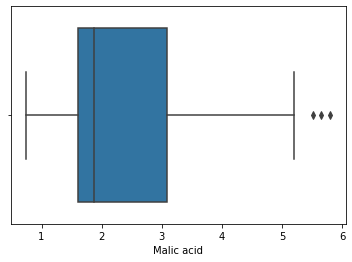

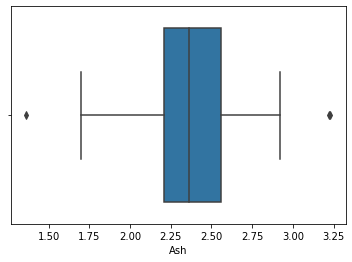

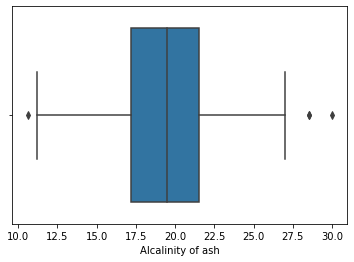

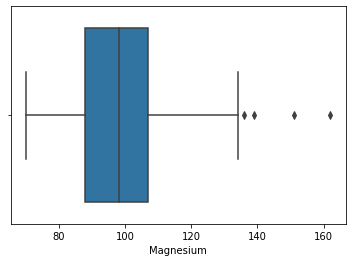

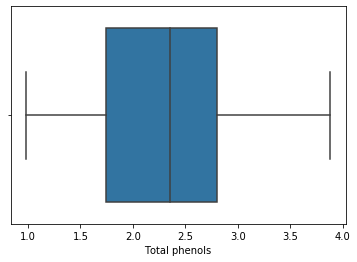

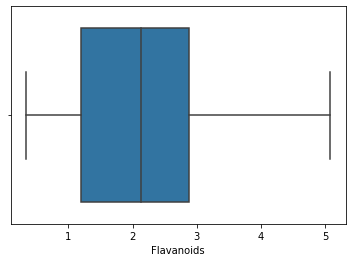

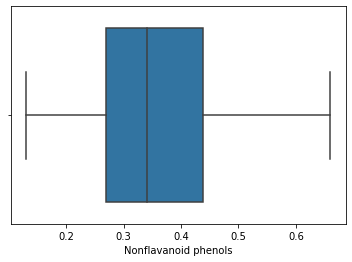

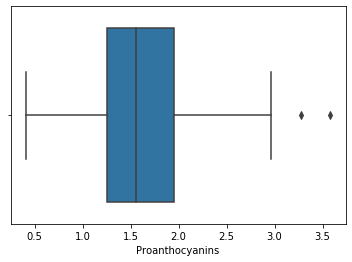

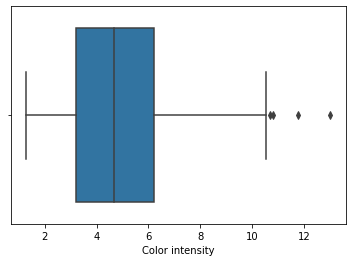

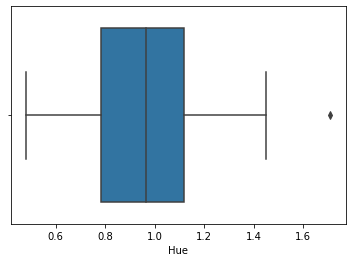

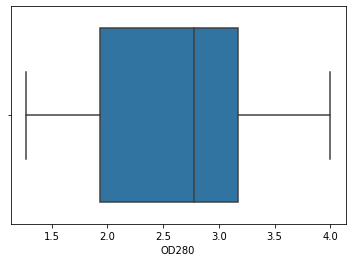

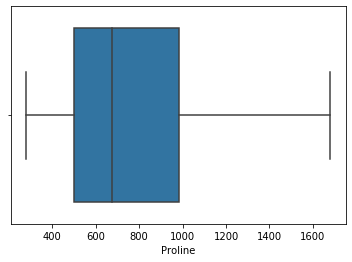

<Figure size 432x288 with 0 Axes>

In [6]:
for column in names[1:]:
    sns.boxplot(df[column])
    plt.figure()

### Normalization

In [7]:
for column in names[1:]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

In [8]:
Y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values
num_samples = X.shape[0]
train_samples = int(0.75*num_samples)
indexes = np.arange(num_samples)
random.shuffle(indexes)
X, Y = X[indexes], Y[indexes]
X_train, Y_train = X[:train_samples, :], Y[:train_samples]
X_test, Y_test = X[train_samples:, :], Y[train_samples:]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(133, 13) (133,)
(45, 13) (45,)


### KNN

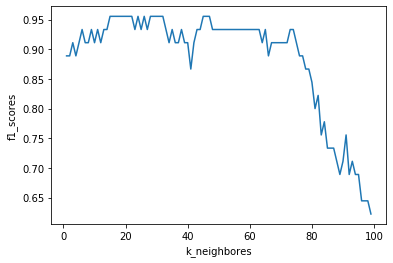

In [9]:
scores = list()
neighbors = list()
for i in range(1, 100, 1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_predict = neigh.predict(X_test)
    _score = f1_score(Y_predict, Y_test, average="micro")
    scores.append(_score)
    neighbors.append(i)
df = pd.DataFrame({"f1_scores": scores, "k_neighbores": neighbors})
sns.lineplot(y="f1_scores", x="k_neighbores", data=df)

## Decision Tree

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))
target_names = ['class 0', 'class 1', 'class 2']
print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))

Confusion matrix SVC linear :
[[13  2  0]
 [ 2 16  0]
 [ 0  0 12]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.87      0.87      0.87        15
     class 1       0.89      0.89      0.89        18
     class 2       1.00      1.00      1.00        12

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



## Support Vector Machine

In [11]:
# linear
parameters = {'C': [1, 10, 100, 1_000, 10_000]}
neigh = SVC(kernel='linear')
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))
target_names = ['class 0', 'class 1', 'class 2']
print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

# rbf
parameters = {'C': [1, 10, 100, 1_000, 10_000], 'gamma': [0.001, 0.1, 1]}
neigh = SVC(kernel='rbf')
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Confusion matrix SVC rbf :")
print(confusion_matrix(Y_test, Y_predict))
print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC linear :
[[15  0  0]
 [ 4 13  1]
 [ 0  0 12]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.79      1.00      0.88        15
     class 1       1.00      0.72      0.84        18
     class 2       0.92      1.00      0.96        12

    accuracy                           0.89        45
   macro avg       0.90      0.91      0.89        45
weighted avg       0.91      0.89      0.89        45

{'C': 1}
Confusion matrix SVC rbf :
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        15
     class 1       1.00      1.00      1.00        18
     class 2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

{'C': 10, 'gamma': 0.1}


C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and

### Ensemble

In [12]:
# Random forest
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90]}
neigh = RandomForestClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Confusion matrix Random Forest :")
print(confusion_matrix(Y_test, Y_predict))
print("Classification report Random Forest :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)


# adaboost
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = AdaBoostClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Confusion matrix AdaBoost :")
print(confusion_matrix(Y_test, Y_predict))
print("Classification report AdaBoost :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

# gradient boosting
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = GradientBoostingClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Confusion matrix Gradient Boosting :")
print(confusion_matrix(Y_test, Y_predict))
print("Classification report Gradient Boosting :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)


C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Confusion matrix Random Forest :
[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
Classification report Random Forest :
              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97        15
     class 1       1.00      0.94      0.97        18
     class 2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

{'n_estimators': 60}


C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Confusion matrix AdaBoost :
[[13  2  0]
 [ 1 17  0]
 [ 0  0 12]]
Classification report AdaBoost :
              precision    recall  f1-score   support

     class 0       0.93      0.87      0.90        15
     class 1       0.89      0.94      0.92        18
     class 2       1.00      1.00      1.00        12

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

{'learning_rate': 0.5, 'n_estimators': 60}
Confusion matrix Gradient Boosting :
[[13  2  0]
 [ 1 17  0]
 [ 0  0 12]]
Classification report Gradient Boosting :
              precision    recall  f1-score   support

     class 0       0.93      0.87      0.90        15
     class 1       0.89      0.94      0.92        18
     class 2       1.00      1.00      1.00        12

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93   

C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
